# Time Series Predictions using ARIMA model on Air Passenger dataset

Dataset link: https://www.kaggle.com/datasets/chirag19/air-passengers

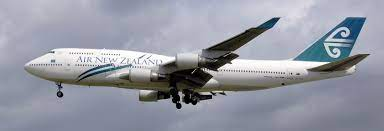

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
sns.set_style('darkgrid')

In [6]:
# reading the file
air = pd.read_csv("D:\Personal\Documents\Official Documents\AirPassengers.csv",
                 header = 0, index_col = 0,
                 parse_dates = True)

In [7]:
air = air.squeeze();

## Data Exploration

In [10]:
display(air.head(), air.tail())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [11]:
air.shape

(144,)

In [14]:
air.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

<b>Inference:</b> 
- This dataset contains airplane passengerdata from 01-01-1949 to 01-12-1960
- 144 months of data i.e 12 years of data

## Data Cleaning

In [17]:
# checking for missing value
air.isnull().sum()

0

<b>Inference:</b> There are no dates with missing value

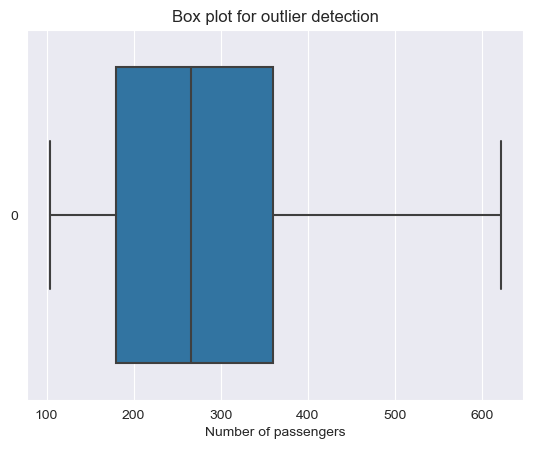

In [22]:
# outlier analysis
sns.boxplot(air, orient = 'h')
plt.title("Box plot for outlier detection")
plt.xlabel("Number of passengers")
plt.show()

<b>Inference:</b> we don't see any outliers in the data

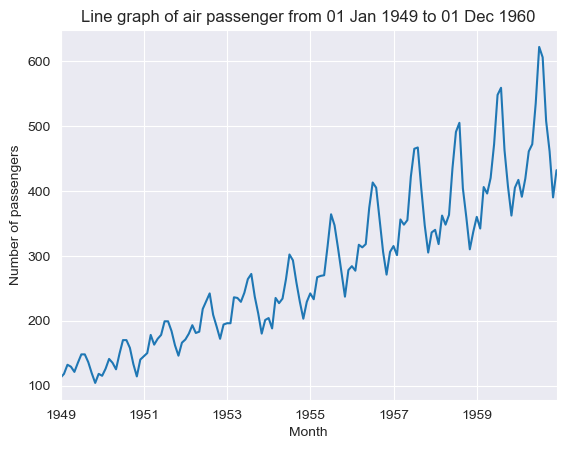

In [28]:
# visualising the time series data by line plot
air.plot();
plt.ylabel("Number of passengers");
plt.title("Line graph of air passenger from 01 Jan 1949 to 01 Dec 1960")
plt.show();

<b>Inference:</b> 
- The data has positive trend of growth
- there is definetely a visible trend

<hr>

In [51]:
# importing adfuller test
from statsmodels.tsa.stattools import adfuller

# Checking the stationality of the data by AD Fuller test
adfuller(air)

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

<b>Inference:</b> Since the p value is greater than 0.05, we conclude that the data is non stationary

### Model Selection <br>
We will be using two methods:
- Visualisation Method
- Model Selection using ARIMA (recommended)

#### Visualisation Method

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

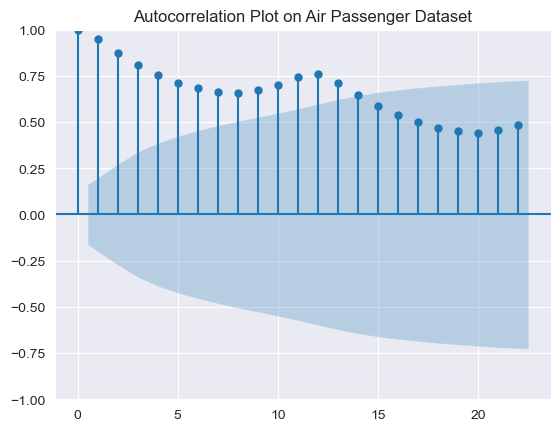

In [45]:
plot_acf(air)
plt.title('Autocorrelation Plot on Air Passenger Dataset')
plt.show()

<b>Inference:</b> `Gradual` change in correlation in ACF plot

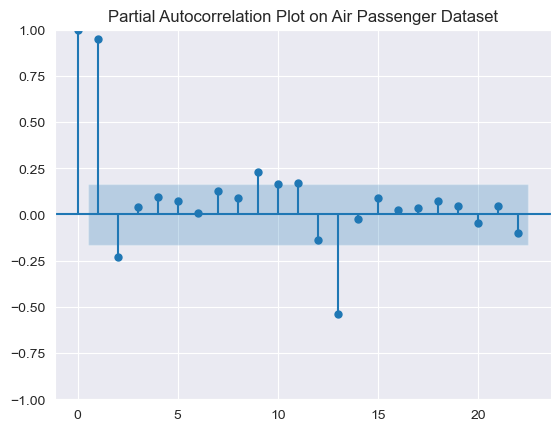

In [47]:
plot_pacf(air)
plt.title("Partial Autocorrelation Plot on Air Passenger Dataset")
plt.show()

<b>Inference:</b> `Drastic` change can be observed in PACF plot

<b>Inference:</b>
Since, ACF plot showed `Gradual` change and PACF showed `Drastic` changed. We can conclude that we will be using Auto Regressive Model (AR Model) According to this method

#### Model Selection using ARIMA

In [54]:
# importing train test split
from pmdarima.model_selection import train_test_split

In [55]:
# splitting the data
train, test = train_test_split(air, train_size = 96)

Since the data comprises of 12 years of data i.e 144 months <br>
We will be using 8 years of data for training i.e 96 months

In [56]:
#importing package for arima
from statsmodels.tsa.arima.model import ARIMA

# fitting the model
model = pm.auto_arima(train, seasonal = True, m = 12)

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Sat, 09 Sep 2023   AIC                            615.965
Time:                                    18:35:16   BIC                            623.222
Sample:                                01-01-1949   HQIC                           618.881
                                     - 12-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<b>Inference:</b> After viewing the model summary, we will be using SARIMAX model <br> without MA

In [59]:
# importing libraries
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1,1,0), seasonal_order = (1,1,0,12))
fit = model.fit()

C:\Users\Asif Sayyed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Asif Sayyed\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
# predicting values 
predicted = fit.predict(start = 96, end = 144)

Since we took month 1 to 96 for training, we will be predicting the values for month 96 to 144

In [63]:
# printing predicted values
predicted

1957-01-01    314.174145
1957-02-01    306.588343
1957-03-01    345.253673
1957-04-01    342.611199
1957-05-01    346.703251
1957-06-01    400.201952
1957-07-01    441.475630
1957-08-01    431.429371
1957-09-01    384.839779
1957-10-01    338.340741
1957-11-01    302.886020
1957-12-01    339.250182
1958-01-01    346.930013
1958-02-01    339.477398
1958-03-01    378.446179
1958-04-01    375.495058
1958-05-01    379.793541
1958-06-01    433.860939
1958-07-01    474.617673
1958-08-01    465.036651
1958-09-01    417.671668
1958-10-01    370.604010
1958-11-01    335.252675
1958-12-01    371.306681
1959-01-01    379.098899
1959-02-01    371.616003
1959-03-01    410.515791
1959-04-01    407.634844
1959-05-01    411.886393
1959-06-01    465.824492
1959-07-01    506.698758
1959-08-01    497.011960
1959-09-01    449.823270
1959-10-01    402.884894
1959-11-01    367.510053
1959-12-01    403.634576
1960-01-01    411.401242
1960-02-01    403.925231
1960-03-01    442.840705
1960-04-01    439.943803


### Plotting actual vs predicted values

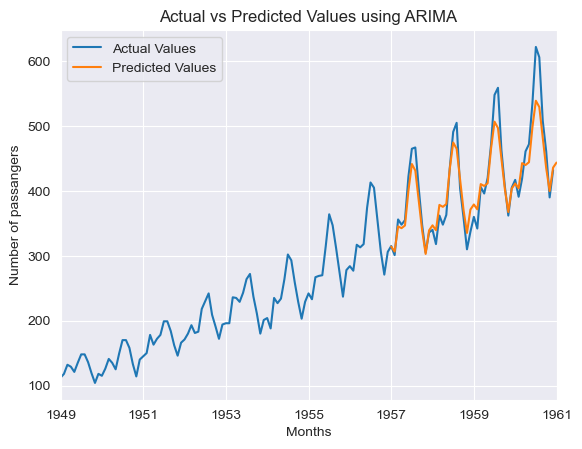

In [70]:
air.plot()
predicted.plot()
plt.title('Actual vs Predicted Values using ARIMA')
plt.xlabel('Months')
plt.ylabel('Number of passangers')
plt.legend(['Actual Values','Predicted Values'])
plt.show()

<b>Inference:</b> As you can see the predicted value are quiet close to the actual values, we will see more model evalutation methods to check the model's accuracy

### Model Evaluation <br>
We will be calculating:
- Mean Absolute Error
- Mean Absolute Percent Error
- Root Mean Squared Error

We will be making
- Residual plots 
- Dist plots
- Autocorrelation plot

In [71]:
# importing libraries for calculating errors
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [73]:
# calculating mean absolute error
mean_absolute_error(air[95:144],predicted)

39.355618774356266

<b>Inference:</b> It means the average error that the mode's predictions have in comparisons with their corresponding target

In [74]:
# calculating mean absolute percent errors
mean_absolute_percentage_error(air[95:144], predicted)

0.0937683790577036

<b>Inference:</b> It means the predicted value differ from the actual value by +9% or -9%

In [76]:
# calculating root mean squared error
mean_squared_error(air[95:144],predicted, squared = False)

48.74581018878616

### Residual Analysis

In [80]:
# storing the residual in a variable
residual = air[95:144]-predicted

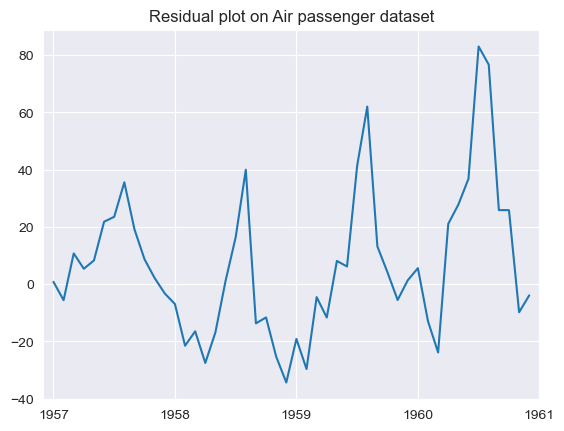

In [83]:
# plotting the residuals
residual.plot();
plt.title("Residual plot on Air passenger dataset")
plt.show()

<b>Inference:</b> We can say our model is good since we don't see any significant trend or seasonal patterns left in the dataset

C:\Users\Asif Sayyed\AppData\Local\Temp\ipykernel_4932\1685284302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


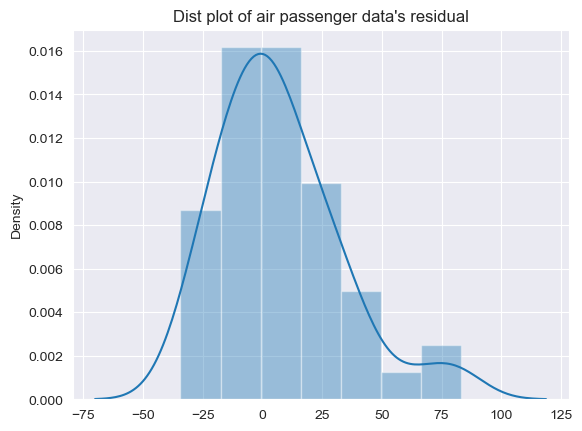

In [89]:
# making dist plot
sns.distplot(residual)
plt.title("Dist plot of air passenger data's residual");
plt.show();

<b>Inference:</b> Data is slightly right skewed but it is not significant enought to consider, it is close to normal distribution and that indicates there aren't many patterns left in the residual of data

### Author
Asif Sayyed